# Preprocessing Banjir

## Preparations

In [1]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os

In [4]:
# Directory for all related files
dataset_dir = 'filtered/'
os.makedirs(dataset_dir, exist_ok=True)

In [5]:
os.listdir(dataset_dir)

['Kecelakaan.csv', 'Kebakaran.csv', 'Gempa Bumi.csv', 'Banjir.csv']

## Loading Dataset

In [8]:
df = pd.read_csv(os.path.join(dataset_dir, 'Banjir.csv'))
print(df.shape)
df.head()

(2994, 1)


,title
0,banjir genangi 23 desa di kabupaten jember
1,"sungai ciliwung meluap, ratusan rumah di bogor..."
2,"andalkan perahu gabus, warga cawang terbiasa d..."
3,tni siapkan posko bantu korban banjir di kampu...
4,"banjir sepinggang di kebon manggis matraman, w..."


## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [9]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,title
0,banjir genangi 23 desa di kabupaten jember
1,"sungai ciliwung meluap, ratusan rumah di bogor..."
2,"andalkan perahu gabus, warga cawang terbiasa d..."
3,tni siapkan posko bantu korban banjir di kampu...
4,"banjir sepinggang di kebon manggis matraman, w..."


In [10]:
# 2. Stemming
# Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,title,stem
0,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember
1,"sungai ciliwung meluap, ratusan rumah di bogor...",sungai ciliwung luap ratus rumah di bogor banjir
2,"andalkan perahu gabus, warga cawang terbiasa d...",andal perahu gabus warga cawang biasa dengan b...
3,tni siapkan posko bantu korban banjir di kampu...,tni siap posko bantu korban banjir di kampung ...
4,"banjir sepinggang di kebon manggis matraman, w...",banjir pinggang di kebon manggis matraman warg...


In [17]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,published date,title,stem,tokens
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"[banjir, genang, 23, desa, di, kabupaten, jember]"
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"[ini, 11, titik, banjir, di, denpasar, yang, b..."
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"[foto, banjir, rob, terjang, semarang]"
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"[longsor, tewas, tiga, orang, jakarta, mulai, ..."
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]"


In [18]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,published date,title,stem,tokens,tokens_clean
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"[banjir, genang, 23, desa, di, kabupaten, jember]","[banjir, genang, 23, desa, kabupaten, jember]"
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"[ini, 11, titik, banjir, di, denpasar, yang, b...","[11, titik, banjir, denpasar, tangan, balipost..."
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"[foto, banjir, rob, terjang, semarang]","[foto, banjir, rob, terjang, semarang]"
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"[longsor, tewas, tiga, orang, jakarta, mulai, ...","[longsor, tewas, orang, jakarta, banjir, ungsi..."
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]","[jalur, pantura, kudus, sendat, akibat, banjir]"


In [19]:
# Gabungkan kembali token pada kolom 'tokens_clean'
df['merged'] = df['tokens_clean'].apply(lambda token: ' '.join(token))
df.head()

,published date,title,stem,tokens,tokens_clean,merged
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"[banjir, genang, 23, desa, di, kabupaten, jember]","[banjir, genang, 23, desa, kabupaten, jember]",banjir genang 23 desa kabupaten jember
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"[ini, 11, titik, banjir, di, denpasar, yang, b...","[11, titik, banjir, denpasar, tangan, balipost...",11 titik banjir denpasar tangan balipost com
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"[foto, banjir, rob, terjang, semarang]","[foto, banjir, rob, terjang, semarang]",foto banjir rob terjang semarang
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"[longsor, tewas, tiga, orang, jakarta, mulai, ...","[longsor, tewas, orang, jakarta, banjir, ungsi...",longsor tewas orang jakarta banjir ungsi langsung
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]","[jalur, pantura, kudus, sendat, akibat, banjir]",jalur pantura kudus sendat akibat banjir


## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

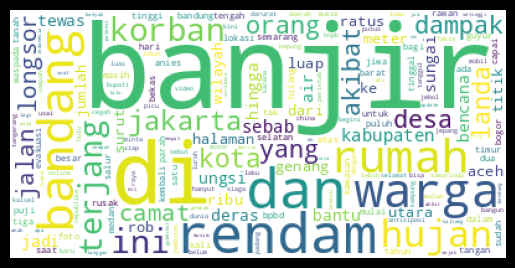

In [20]:
text_before = ' '.join(df['stem'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

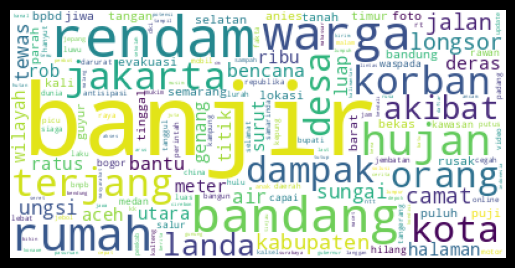

In [21]:
text_after = ' '.join(df['merged'])
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

In [22]:
# Simpan output ke dalam CSV
df.to_csv('Banjir-2018-2023-pre.csv', index=False)